# Project: Investigate a Dataset - No Show Appointments - 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
	
> I chose the `No Show Appointment DataSet`, This data have data collected about some patients who made appointments, where some of them miss it and others show up. ** My objective is to try to investigate whether its predictable to miss an appointment and what are the main factors affecting these missed appointments**

### Some Info about the Columns in the DataSet

- `ScheduledDay` tells us on what day the patient set up their appointment.
- `Neighborhood` indicates the location of the hospital.
- `Scholarship` indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
**Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.**


In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


### Gathering Data 

In [2]:
#Loading data from csv File `noshowappointments-kagglev2-may-2016.csv`

df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Accessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### My Remarks Checkpoint
- schedualed_day --> Datetype
- appointment_day --> Datetype
- all column names should be lowercased for easier usage
- No-show --> no_show

In [4]:
# Checking if there are any full duplicated rows
df.duplicated().sum()

0

In [5]:
#Checking is there are any missing values
df.isna().sum().sum()

0

In [6]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [7]:
(df['Age'] < 0).sum()

1

In [8]:
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
(df['Age'] > 100).sum()

7

In [10]:
df[df['Age'] > 100].PatientId.value_counts()

3.196321e+13    4
7.482346e+14    1
9.762948e+14    1
2.342836e+11    1
Name: PatientId, dtype: int64

## My Remarks Checkpoint
- I discovered that there was a value of `age = -1` which will need to be dropped from the data set

**It came to my attention that the max age was 115, at first I thought its a false entery but then I found that they are only 7 entries out of 110527 and 4 of the appointments of the same patient which means there were only 4 patients of age over 100 of the whole appointments and that is very possible, Therfore I decided to leave those 7 entries as they are**

In [11]:
df['Gender'].value_counts

<bound method IndexOpsMixin.value_counts of 0         F
1         M
2         F
3         F
4         F
         ..
110522    F
110523    F
110524    F
110525    F
110526    F
Name: Gender, Length: 110527, dtype: object>

In [12]:
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [13]:
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [14]:
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [15]:
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [16]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [17]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [18]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [19]:
df[df['Handcap'] > 1].sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
46581,6.839565e+11,5550664,F,2016-04-06T11:55:21Z,2016-05-09T00:00:00Z,85,SANTA LUÍZA,0,1,1,0,2,0,Yes
76547,1.491829e+13,5664028,F,2016-05-05T10:58:48Z,2016-05-05T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
30168,2.738747e+11,5745549,M,2016-05-30T12:05:20Z,2016-05-30T00:00:00Z,84,RESISTÊNCIA,0,1,0,0,2,0,No
68228,4.159532e+14,5565184,M,2016-04-11T08:34:31Z,2016-05-16T00:00:00Z,83,ANDORINHAS,0,1,0,0,2,0,Yes
46583,3.118989e+13,5715641,F,2016-05-18T14:47:37Z,2016-05-30T00:00:00Z,89,ILHA DO PRÍNCIPE,0,1,0,0,2,0,Yes


### My Remarks Checkpoint
- All the Factor columns being studied `[Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received]` are represented by either a `0` or a `1`, However the `Handcap` column had some values more than 1 which doesn't have any refrence to identify what that means, it may be a wrong entery or a matter of urgency and since there are no refrence to that data indication I decided to **Drop those Enteries > 1**

In [20]:
df['AppointmentID'].duplicated().sum()

0

## Assessing Conclusion 
- I discovered that there was a value of age = -1
- `Handcap` column had some values more than 1 which doesn't have any refrence to identify what that means
- schedualed_day Datetype is wrong
- appointment_day Datetype is wrong
- all column names should be lowercased for easier usage
- No-show is a very confusing column and it needs to be reverted for easier redability, because here `Yes` means The patient didn't show while `No` means the patient did show.
- will change the name of `No-show` to `is_show` for readability purposes

# Data Cleaning

- Rename Column Names to lowercase, trimmed and all factors changing their name to be more readable `ex: is_scholorship, is_diabetes, ...`
- Data Types
    - Will change All `0`s and `1`s to `No`s and `Yes`s changing the Data type from `int` to `str`
    - `Schedualed_day` & `Appointment_day` needs to change to datetime 
- Dropping `handcap` Entries > 1 
- Dropping `Age` = -1

In [21]:
# Creating a copy of the Clean DataFrame so we won't edit on the main dataset

df_clean_v1 = df.copy()

>Renaming Columns

In [22]:
#lower Cased
df_clean_v1.rename(columns = lambda col: col.lower(), inplace = True)

In [23]:
df_clean_v1.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [24]:
## changing the Column Names to be more meaningful

is_names = ['scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received']

for name in is_names:
    df_clean_v1.rename(columns = {name : 'is_' + name}, inplace= True);

df_clean_v1.rename(columns = {'no-show' : 'is_show'}, inplace = True);
df_clean_v1.rename(columns = {'scheduledday' : 'scheduled_day'}, inplace = True);
df_clean_v1.rename(columns = {'appointmentday' : 'appointment_day'}, inplace = True);

df_clean_v1.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'is_scholarship',
       'is_hipertension', 'is_diabetes', 'is_alcoholism', 'is_handcap',
       'is_sms_received', 'is_show'],
      dtype='object')

> Changing Data Types of `appointment_day` & `scheduled_day`

In [25]:
dtype_list = ['appointment_day', 'scheduled_day']

for col in dtype_list:
    df_clean_v1[col] = pd.to_datetime(df_clean_v1[col]);

df_clean_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patientid        110527 non-null  float64            
 1   appointmentid    110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   is_scholarship   110527 non-null  int64              
 8   is_hipertension  110527 non-null  int64              
 9   is_diabetes      110527 non-null  int64              
 10  is_alcoholism    110527 non-null  int64              
 11  is_handcap       110527 non-null  int64              
 12  is_sms_received  110527 non-null  int64              
 13 

> Changing the `0` and `1` into `Yes` and `No`

> Replacing all the `No`s with `Yes` in is_show

In [26]:
is_list = ['is_scholarship', 'is_hipertension', 'is_diabetes', 'is_alcoholism', 'is_handcap', 'is_sms_received']

for col in is_list:
    df_clean_v1[col] = df_clean_v1[col].replace(0,'No')
    df_clean_v1[col] = df_clean_v1[col].replace(1,'Yes')
    df_clean_v1[col].astype('str');
    
df_clean_v1.sample(5)    

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,is_scholarship,is_hipertension,is_diabetes,is_alcoholism,is_handcap,is_sms_received,is_show
40695,9.963129e+14,5689772,F,2016-05-12 08:58:00+00:00,2016-05-12 00:00:00+00:00,85,CARATOÍRA,No,Yes,Yes,No,No,No,No
1919,6.313276e+11,5623015,M,2016-04-26 13:25:12+00:00,2016-04-29 00:00:00+00:00,0,FORTE SÃO JOÃO,No,No,No,No,No,Yes,Yes
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,No,No,No,No,No,No,Yes
5674,3.885168e+12,5706922,F,2016-05-17 08:58:21+00:00,2016-05-17 00:00:00+00:00,7,GURIGICA,No,No,No,No,No,No,No
65192,7.642693e+13,5648064,M,2016-05-02 14:57:22+00:00,2016-05-03 00:00:00+00:00,2,JARDIM CAMBURI,No,No,No,No,No,No,No


In [27]:
df_clean_v1['is_show'].value_counts()

No     88208
Yes    22319
Name: is_show, dtype: int64

In [28]:
df_clean_v1['is_show'] = df_clean_v1['is_show'].replace('Yes','no')
df_clean_v1['is_show'] = df_clean_v1['is_show'].replace('No','yes')
df_clean_v1.is_show = df_clean_v1['is_show'].str.title()

In [29]:
# Validating the numbers has changed
df_clean_v1['is_show'].value_counts()

Yes    88208
No     22319
Name: is_show, dtype: int64

>Dropping is_handcap = [2,3,4]

In [30]:
df_clean_v1['is_handcap'].value_counts()

No     108286
Yes      2042
2         183
3          13
4           3
Name: is_handcap, dtype: int64

In [31]:
drop_list = [2,3,4]
for val in drop_list:
    df_clean_v1 = df_clean_v1[df_clean_v1.is_handcap != val]
    
df_clean_v1['is_handcap'].value_counts()

No     108286
Yes      2042
Name: is_handcap, dtype: int64

> Dropping Age = -1

In [32]:
df_clean_v1 = df_clean_v1[df_clean_v1.age != -1]
df_clean_v1[df_clean_v1['age'] < 0]

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,is_scholarship,is_hipertension,is_diabetes,is_alcoholism,is_handcap,is_sms_received,is_show


In [33]:
df_clean_v1.shape

(110327, 14)

<a id='eda'></a>
## Exploratory Data Analysis




### What factors affect Attendence of Paitience to their Appointments?

> Creating two functions one to generate PieChart and tthe second to generate BarChart

In [34]:
def bar_chart(df,col):
    df[col].value_counts().plot(kind='bar', figsize=(10,4))
    plt.title(f'{col} Distribution'.title(), weight= 'bold')
    plt.xlabel(f'{col} (Y/N)', weight= 'bold')
    plt.ylabel('value_counts', weight= 'bold')

In [35]:
def pie_chart(df, col):
    df[col].value_counts().plot(kind= 'pie',figsize=(14,8),
                                 autopct='%1.1f%%',textprops={'fontsize': 14, 'weight': 'bold'});
    plt.title(f'{col} Distribution'.title(), fontsize= 16, weight = 'bold')
    plt.ylabel('')
    plt.axis ('equal')

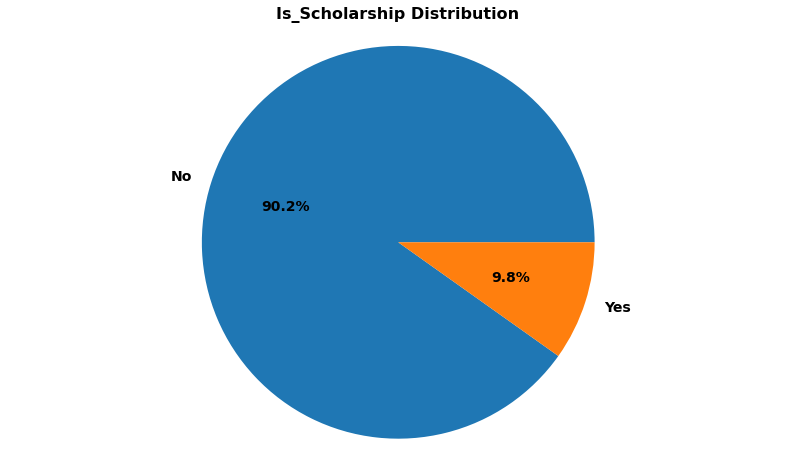

In [36]:
pie_chart(df_clean_v1,'is_scholarship')

> 90.2% of the Patients doesn't have scholarship

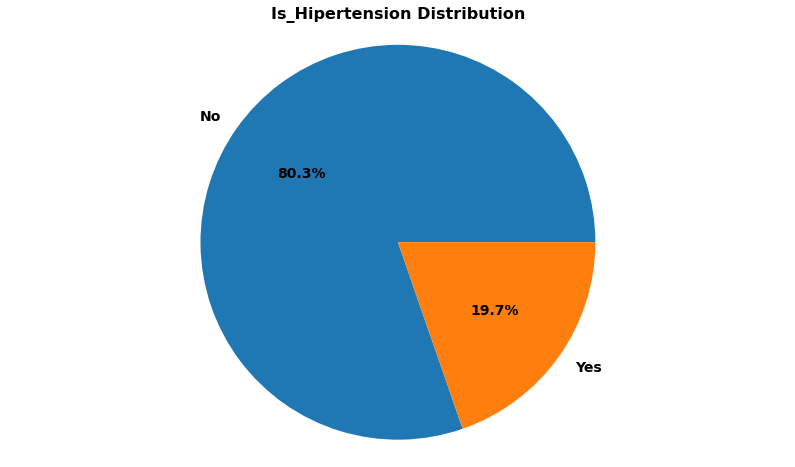

In [37]:
pie_chart(df_clean_v1,'is_hipertension')

> only around 20% of the patients have Hipertension

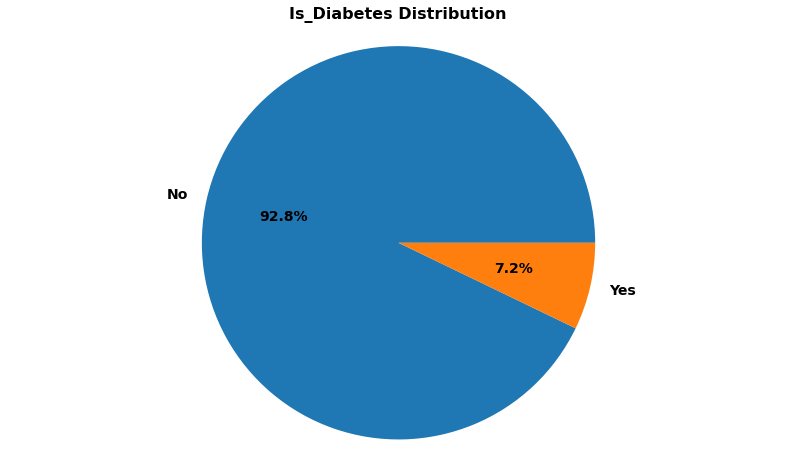

In [38]:
pie_chart(df_clean_v1,'is_diabetes')

> Only 7.2% of the Patients are Diabetic

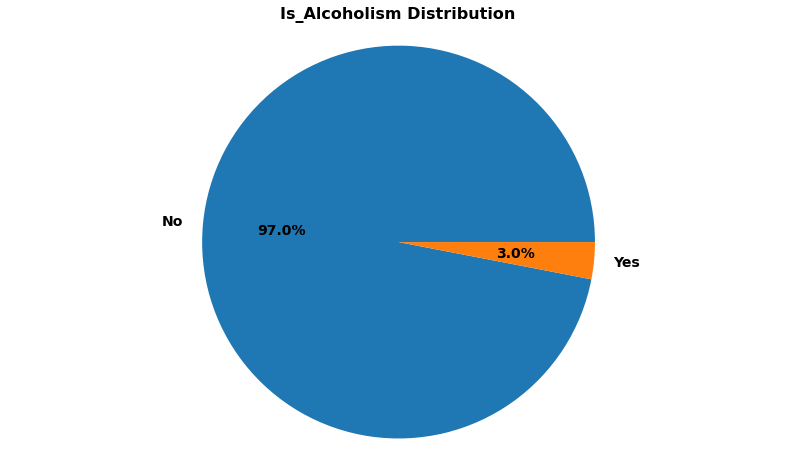

In [39]:
pie_chart(df_clean_v1,'is_alcoholism')

> only 3% are Alcholic

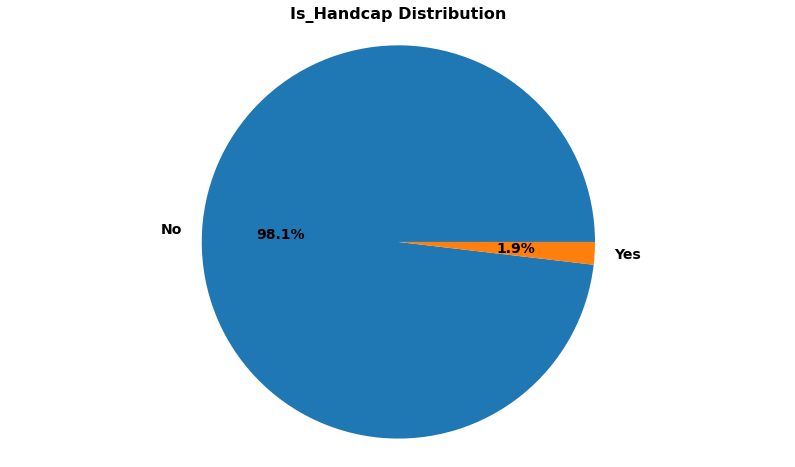

In [40]:
pie_chart(df_clean_v1,'is_handcap')

> only 2 % are Handcapped

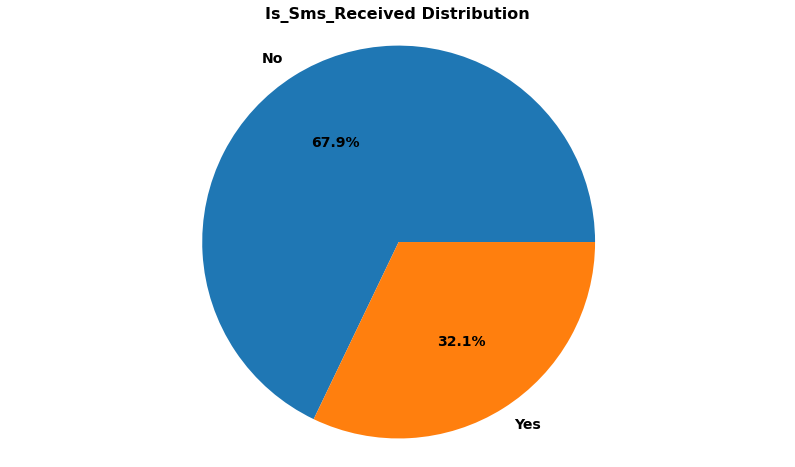

In [41]:
pie_chart(df_clean_v1,'is_sms_received')

> 68% of the patients didn't recieve a confirmation msg

### How Much Patients did attend??

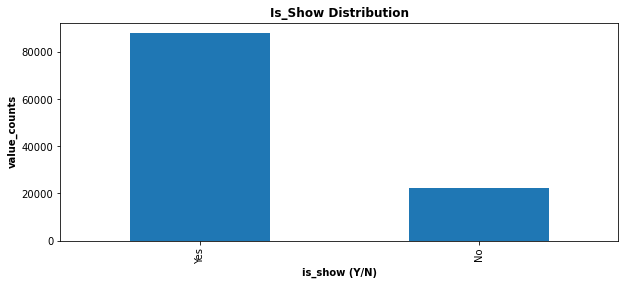

In [42]:
bar_chart(df_clean_v1,'is_show')

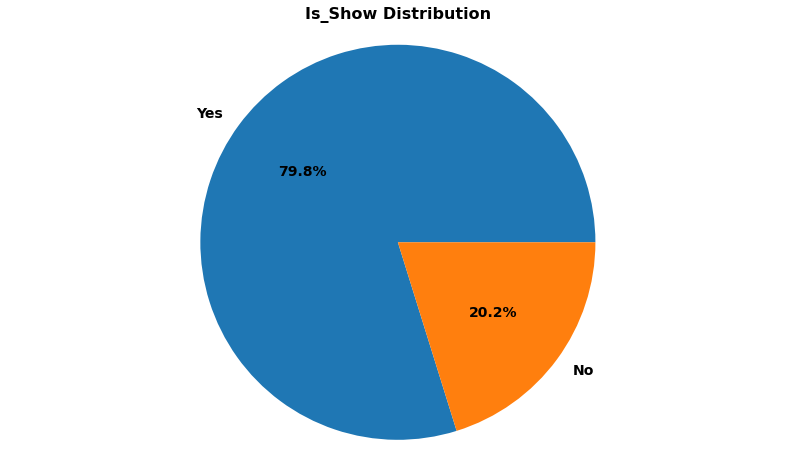

In [43]:
pie_chart(df_clean_v1,'is_show')

In [44]:
df_clean_v1.sample(5)

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,is_scholarship,is_hipertension,is_diabetes,is_alcoholism,is_handcap,is_sms_received,is_show
18018,7.375115e+13,5712963,F,2016-05-18 09:32:26+00:00,2016-05-18 00:00:00+00:00,84,ILHA DAS CAIEIRAS,No,Yes,No,No,No,No,Yes
84147,9.461828e+11,5712929,F,2016-05-18 09:29:18+00:00,2016-06-03 00:00:00+00:00,62,MORADA DE CAMBURI,No,Yes,No,No,No,Yes,Yes
17742,5.729433e+13,5658540,F,2016-05-04 11:19:24+00:00,2016-05-06 00:00:00+00:00,57,SÃO CRISTÓVÃO,No,No,No,No,No,No,Yes
64601,5.799918e+12,5692446,M,2016-05-12 15:20:32+00:00,2016-05-12 00:00:00+00:00,61,JARDIM CAMBURI,No,No,No,No,No,No,Yes
56761,1.779894e+13,5658248,F,2016-05-04 10:46:13+00:00,2016-05-12 00:00:00+00:00,39,ILHA DO PRÍNCIPE,No,No,No,No,No,Yes,Yes


> Most of the patients(80%) do attend their appointments 

## Does the Gender Affects patients to show up for the appointment?

In [45]:
male_insight = df_clean_v1.query('gender == "M"').groupby('is_show',as_index = False).count()
male_insight.rename(columns = {'gender': 'males'}, inplace = True)
male_insight.drop(columns=['patientid','appointmentid','scheduled_day','appointment_day','age','neighbourhood','is_scholarship','is_hipertension','is_diabetes','is_alcoholism','is_handcap', 'is_sms_received'],inplace=True)
male_insight

,is_show,males
0,No,7710
1,Yes,30887


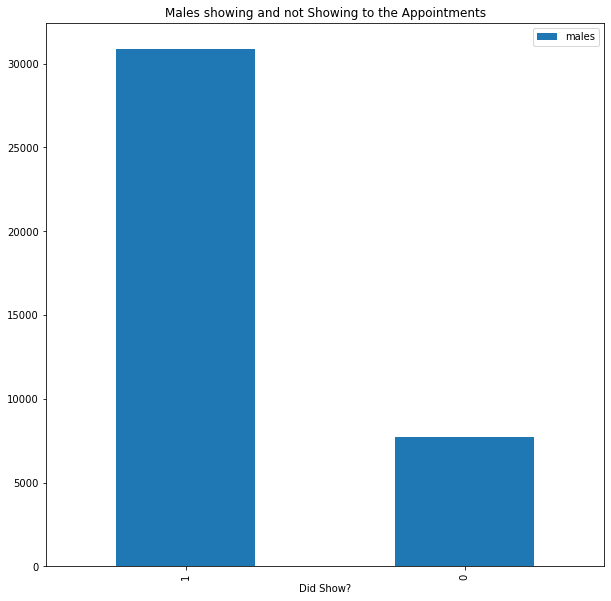

In [46]:
male_insight.plot(kind='bar',figsize=(10,10));
plt.title('Males showing and not Showing to the Appointments');
plt.xlabel('Did Show?');
plt.gca().invert_xaxis();

In [47]:
female_insight = df_clean_v1.query('gender == "F"').groupby('is_show',as_index = False).count()
female_insight.rename(columns = {'gender': 'females'}, inplace = True)
female_insight.drop(columns=['patientid','appointmentid','scheduled_day','appointment_day','age','neighbourhood','is_scholarship','is_hipertension','is_diabetes','is_alcoholism','is_handcap', 'is_sms_received'],inplace=True)
female_insight

,is_show,females
0,No,14568
1,Yes,57162


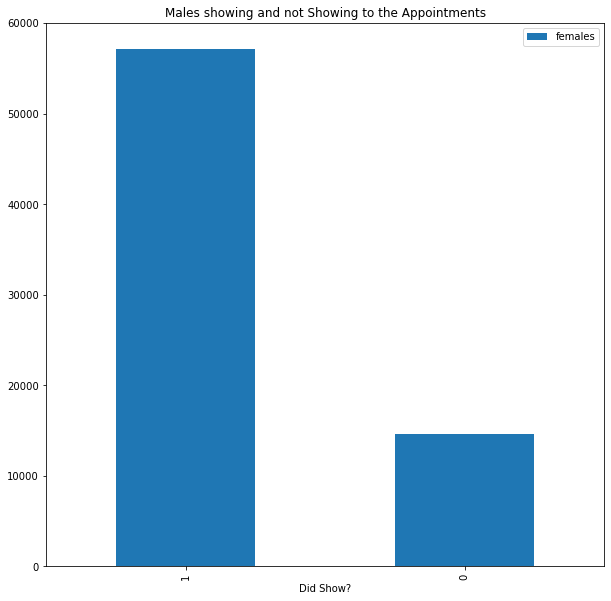

In [48]:
female_insight.plot(kind='bar',figsize=(10,10));
plt.title('Males showing and not Showing to the Appointments');
plt.xlabel('Did Show?');
plt.gca().invert_xaxis();

> From The two graphs above the Amount of females making appoints are nearly double the amount of men making appointments, However the percentage of not showing is nearly the same in both genders and therfore Gender doesn't affect shoing up for the appointment or not

### Does Age Affect the patients Showing?

In [65]:
#Different Age Grouping

df_baby = df_clean_v1.query('age <= 2')
df_child = df_clean_v1.query('age <=12 & age >2')
df_teen = df_clean_v1.query('age >12 & age <=18')
df_adult = df_clean_v1.query('age > 18 & age <=59')
df_old_adult = df_clean_v1.query('age > 60')


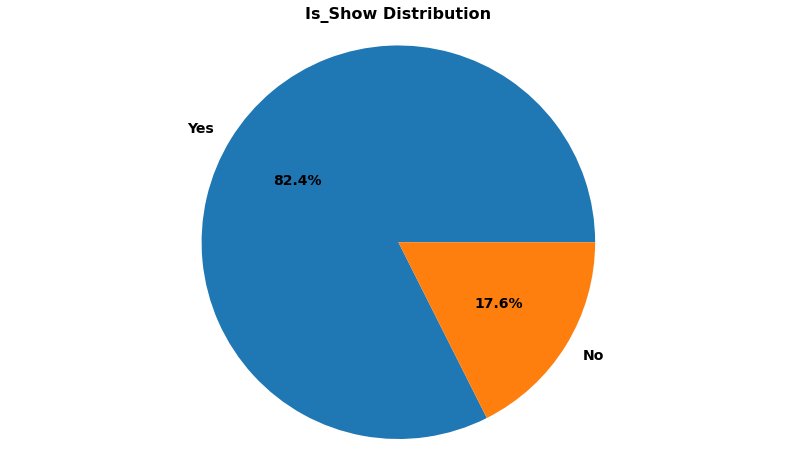

In [50]:
pie_chart(df_baby,'is_show')

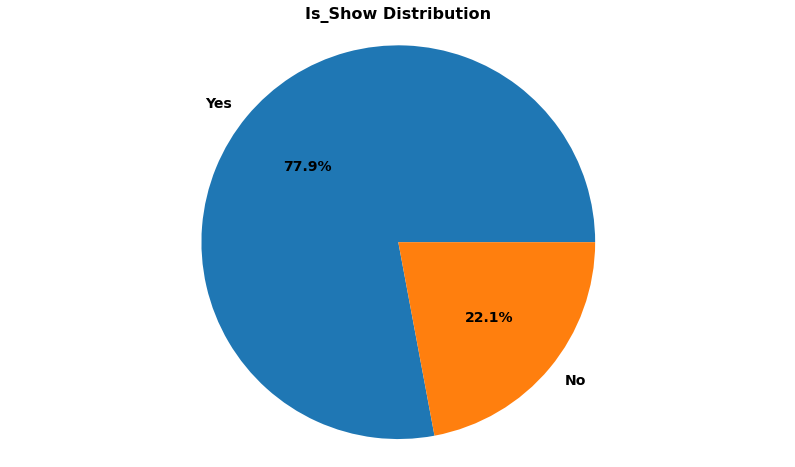

In [51]:
pie_chart(df_child,'is_show')

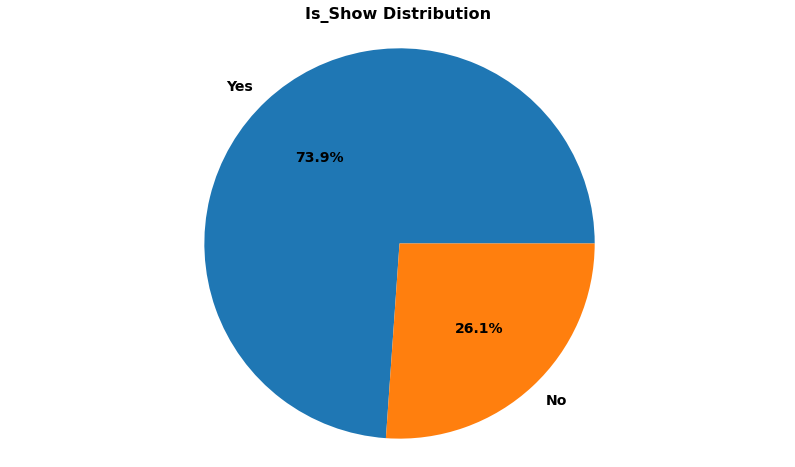

In [52]:
pie_chart(df_teen,'is_show')

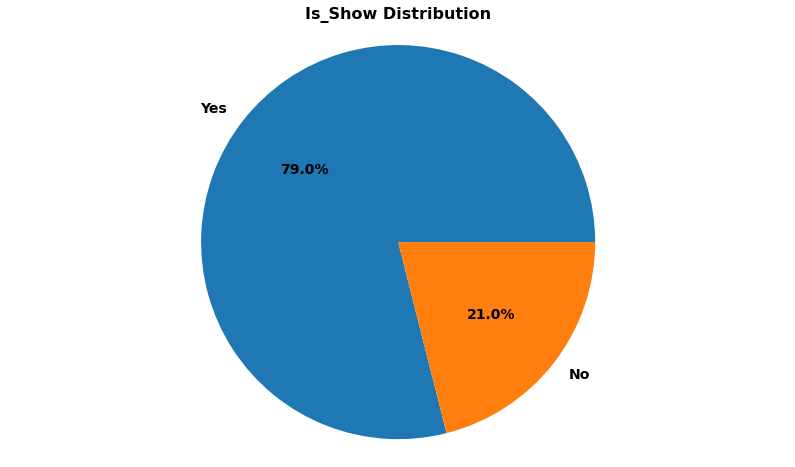

In [53]:
pie_chart(df_adult,'is_show')

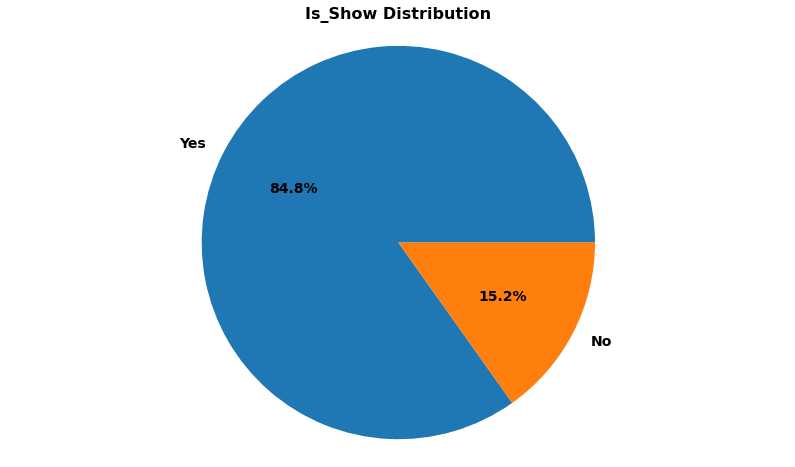

In [54]:
pie_chart(df_old_adult,'is_show')

> There is no Gurantee that age have an effect on not showing for the appointments howeverthe largest percentage was 26% in the Teen Age but not sofar away from the other percentages 

## I wanted to check if sms recieved affects males or females more

In [66]:
df_m_no_sms = df_clean_v1.query("gender == 'M' & is_sms_received == 'No'")

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,is_scholarship,is_hipertension,is_diabetes,is_alcoholism,is_handcap,is_sms_received,is_show
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,No,No,No,No,No,Yes
13,9.113946e+14,5636249,M,2016-04-28 14:52:07+00:00,2016-04-29 00:00:00+00:00,28,NOVA PALESTINA,No,No,No,No,No,No,Yes
16,8.457439e+13,5633121,M,2016-04-28 08:51:47+00:00,2016-04-29 00:00:00+00:00,50,NOVA PALESTINA,No,No,No,No,No,No,Yes
28,5.926172e+12,5642400,M,2016-04-29 15:48:02+00:00,2016-04-29 00:00:00+00:00,51,SÃO PEDRO,No,No,No,No,No,No,Yes
31,3.112849e+11,5628907,M,2016-04-27 12:07:14+00:00,2016-04-29 00:00:00+00:00,12,NOVA PALESTINA,Yes,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110501,4.544252e+11,5758133,M,2016-06-01 10:19:12+00:00,2016-06-01 00:00:00+00:00,44,MARIA ORTIZ,No,No,No,No,No,No,Yes
110506,8.973883e+11,5758779,M,2016-06-01 11:09:20+00:00,2016-06-01 00:00:00+00:00,5,MARIA ORTIZ,No,No,No,No,No,No,Yes
110509,4.952968e+14,5786750,M,2016-06-08 08:50:51+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,No,No,No,No,No,No,Yes
110513,8.674778e+13,5785964,M,2016-06-08 07:52:55+00:00,2016-06-08 00:00:00+00:00,2,ANTÔNIO HONÓRIO,No,No,No,No,No,No,Yes


In [56]:
df_m_sms = df_clean_v1.query("gender == 'M' & is_sms_received == 'Yes'")

In [57]:
df_f_no_sms = df_clean_v1.query("gender == 'F' & is_sms_received == 'No'")

In [58]:
df_f_sms = df_clean_v1.query("gender == 'M' & is_sms_received == 'Yes'")

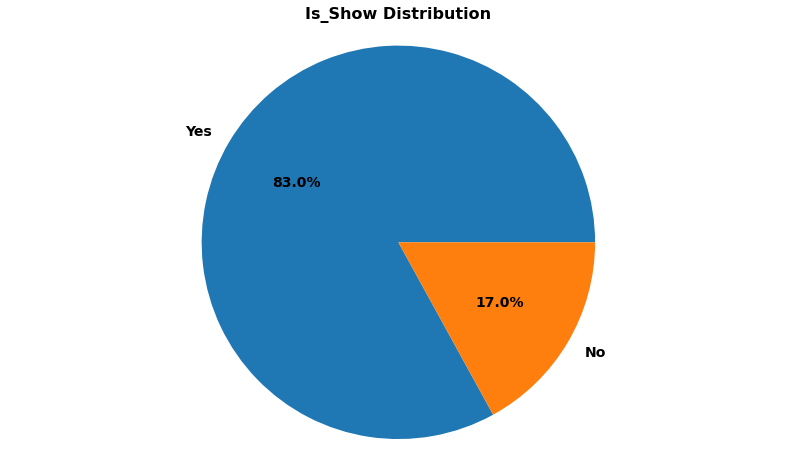

In [59]:
pie_chart(df_m_no_sms,'is_show')

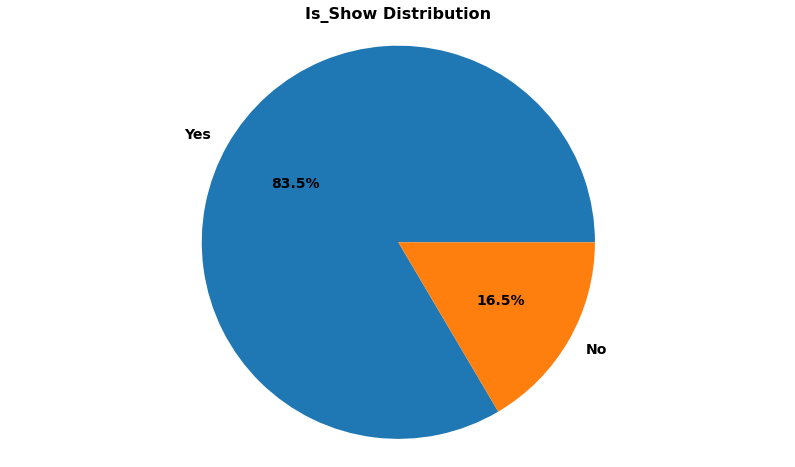

In [60]:
pie_chart(df_f_no_sms,'is_show')

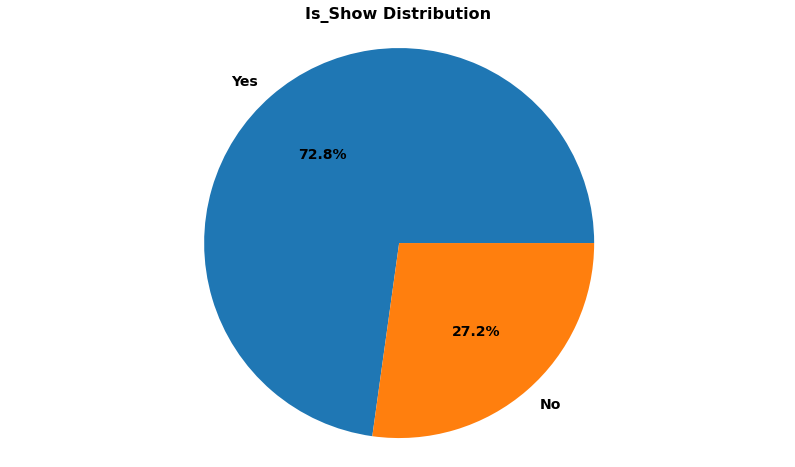

In [61]:
pie_chart(df_m_sms,'is_show')

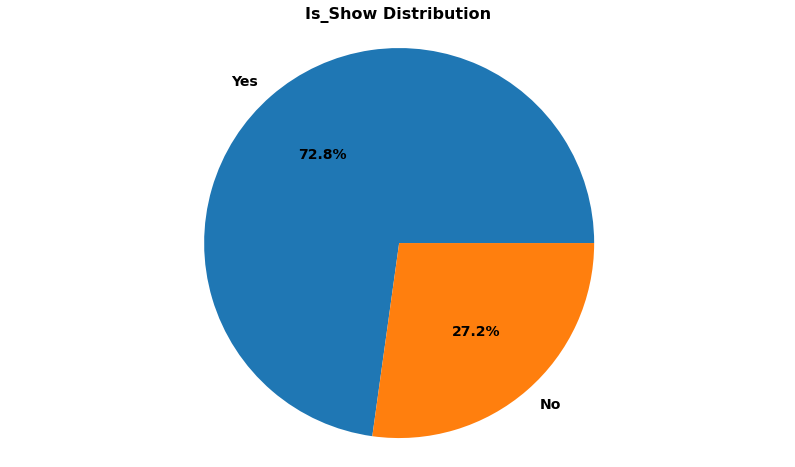

In [62]:
pie_chart(df_f_sms,'is_show')

> The four graphs above show that The total amount of patients(regardless their gender) who attended with no sms are more than the ones who attended with SMS and that was pretty weird discovery from the data. and actually both percentages where nearly the same if we took gender as the variable to the SMS responding to attend

# Reviewed Part
- Multiple representations in one chart
- customizing Legends, title, figsize, color

Text(0, 0.5, 'Amount of Patients Attended')

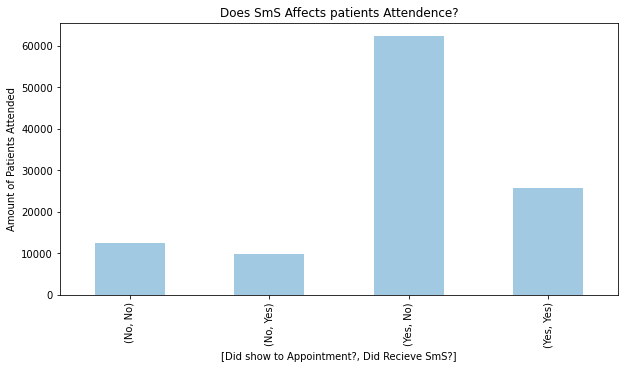

In [78]:
graph = df_clean_v1.groupby('is_show')['is_sms_received'].value_counts().plot(kind='bar', figsize = (10,5), 
                                                                      title= 'Does SmS Affects patients Attendence?',
                                                                     color = '#a1cae2');
graph.set_xlabel('[Did show to Appointment?, Did Recieve SmS?]')
graph.set_ylabel('Amount of Patients Attended')

> This is a different reprentation to the question `Does sms recieved affects patient attendence?` 
A better Represented graph in a more neat and readable way and still derives to the same results as the pie charts



<a id='conclusions'></a>
## Conclusions

### Introduction
- We started by importting our libraries
- We asked a main question as a direction for our analysis

### Data Wrangling
- Gathering Data
    - We loaded a csv file having our dataset
- Assessing Data
    - We used programatic assessing to discover multiple of tidiness and cleanliness issues
- Cleaning Data
    - we used multiple programatic ways to clean our dataset that is relevent to our analysis
### Ensights and Visualizations
- we used mainly pie charts and bar charts to discover more about the data and try to get insights
- We have checked some variables on their own and multiple variables grouped together giving us insights

### Limitations
- I couldn't find a solid conclusion from the dataset of the factors affecting people not to attend, I beleive we are limited to the information only to the dataset available, however there may be alot more factors that needs to be into consideration to draw a full conclusion on such a matter.
- All the variable have nearly equal effect on people not attending which didn't help me to gurantee that a certain variable had the mass effect on patients not attending their appointments


### Review 1
- I did add a Graph that addresses two variables(showing for appointment & MSG Recieved) and shows the number of patients at the same time
- Did customize my graph to be well presented with (title,  legend, figsize, etc...).